In [56]:
import numpy as np
import matplotlib.pyplot as plt

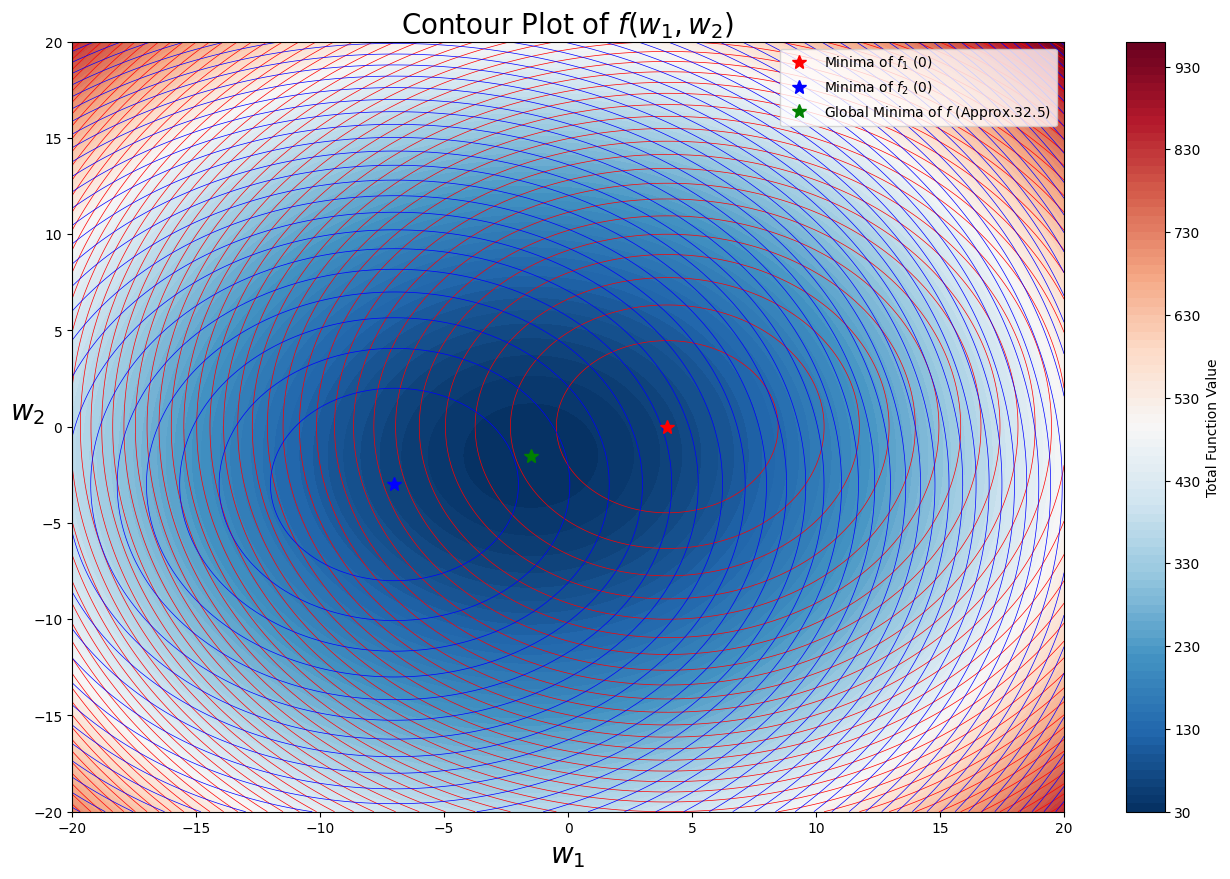

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define two heterogeneous functions
def f1(w1, w2):
    return ((w1 - 4)**2 + (w2)**2)

def f2(w1, w2):
    return (w1 + 7)**2 + (w2 + 3)**2 

def f(w1, w2):
    return 0.5*(f1(w1, w2) + f2(w1, w2)) 

w1 = np.linspace(-20, 20, 300)
w2 = np.linspace(-20, 20, 300)
W1, W2 = np.meshgrid(w1, w2)
Z1 = f1(W1, W2)
Z2 = f2(W1, W2)
Z = f(W1, W2)

plt.figure(figsize=(16, 10))

contour_lines_1 =  plt.contour(W1, W2, Z1, levels=50, colors='red', linewidths=0.5)
contour_lines_2 =  plt.contour(W1, W2, Z2, levels=50, colors='blue', linewidths=0.5)

plt.plot(4, 0, 'r*', markersize=10, label=f'Minima of $f_1$ ({f1(4, 0)})')
plt.plot(-7, -3, 'b*', markersize=10, label=f'Minima of $f_2$ ({f2(-7, -3)})')



contour = plt.contourf(W1, W2, Z, levels=100, cmap='RdBu_r', alpha=1)
plt.colorbar(contour, label='Total Function Value', orientation='vertical')
plt.plot(-1.5, -1.5, 'g*', markersize=10, label=f'Global Minima of $f$ (Approx.{f(-1.5, -1.5)})')

plt.title("Contour Plot of $f(w_1, w_2)$", fontsize=20)
plt.xlabel("$w_1$", fontsize=20)
plt.ylabel("$w_2$", rotation=0, fontsize=20)
plt.legend()

# Show the plot
plt.show()


In [34]:
def grad_f1(w):
    grad_w1 = 2 * (w[0] - 4)
    grad_w2 = 2 * w[1]
    return np.array([grad_w1, grad_w2])

def grad_f2(w):
    grad_w1 = 2 * (w[0] + 7)
    grad_w2 = 2 * (w[1] + 3)
    return np.array([grad_w1, grad_w2])

def grad_f(w):
    return 0.5*(grad_f1(w) + grad_f2(w))

def grad_step_f1(w, lr):
    return w - lr * grad_f1(w)

def grad_descent_f1(w_init, lr, n_iter):
    w = w_init
    w_list = [w]
    for i in range(n_iter):
        w = grad_step_f1(w, lr)
        w_list.append(w)
    return np.array(w_list)

def grad_step_f2(w, lr):
    return w - lr * grad_f2(w)

def grad_descent_f2(w_init, lr, n_iter):
    w = w_init
    w_list = [w]
    for i in range(n_iter):
        w = grad_step_f2(w, lr)
        w_list.append(w)
    return np.array(w_list)

def grad_step(w, lr):
    return w - lr * grad_f(w)

def grad_descent_f(w_init, lr, n_iter):
    w = w_init
    w_list = [w]
    for i in range(n_iter):
        w = grad_step(w, lr)
        w_list.append(w)
    return np.array(w_list)

In [37]:
#grdient descent for f
w_init = np.array([-1.5, -1.5])
lr = 0.01
n_iter = 200


w_list_f = grad_descent_f(w_init, lr, n_iter)
w_list_f1 = grad_descent_f1(w_init, lr, n_iter)
w_list_f2 = grad_descent_f2(w_init, lr, n_iter)

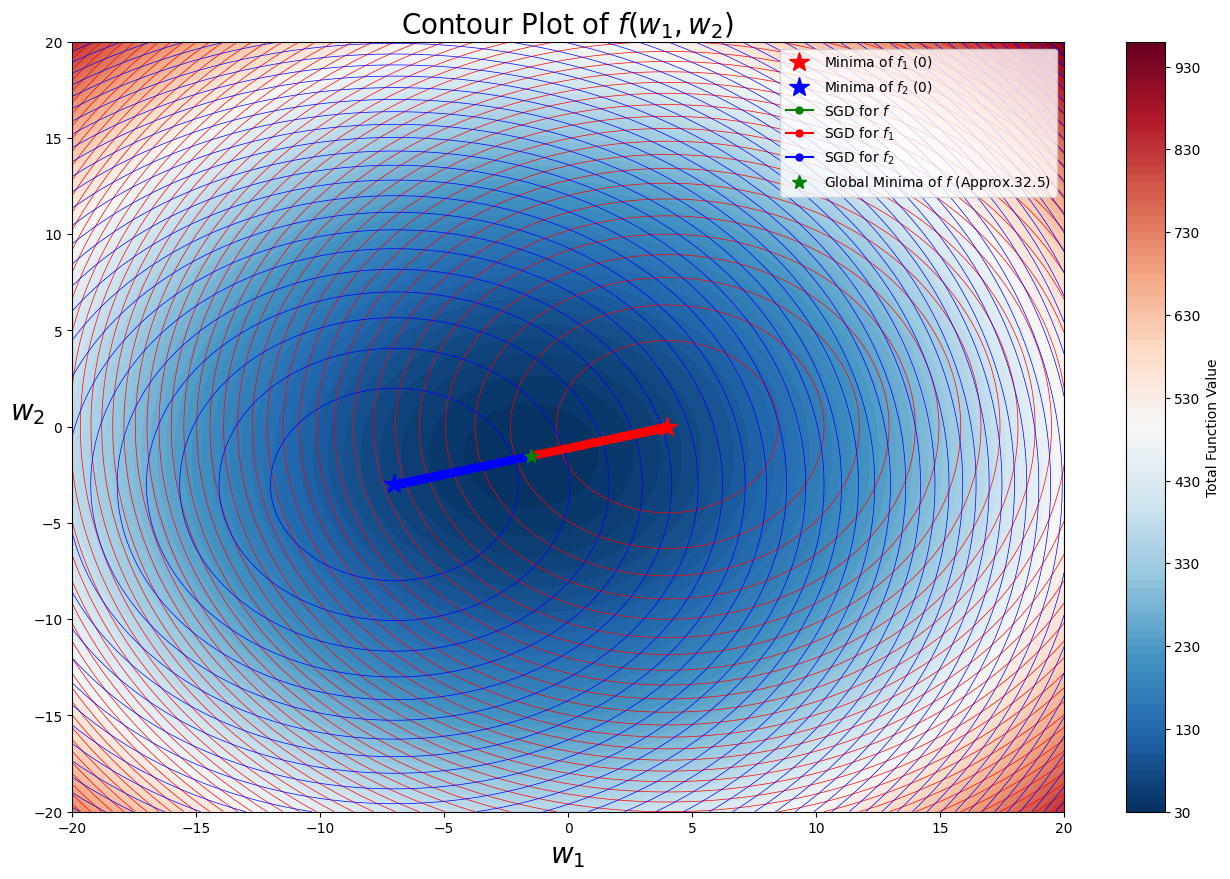

In [39]:
plt.figure(figsize=(16, 10))

contour_lines_1 =  plt.contour(W1, W2, Z1, levels=50, colors='red', linewidths=0.5)
contour_lines_2 =  plt.contour(W1, W2, Z2, levels=50, colors='blue', linewidths=0.5)

plt.plot(4, 0, 'r*', markersize=15, label=f'Minima of $f_1$ ({f1(4, 0)})')
plt.plot(-7, -3, 'b*', markersize=15, label=f'Minima of $f_2$ ({f2(-7, -3)})')

plt.plot(w_list_f[:, 0], w_list_f[:, 1], 'go', label='SGD for $f$', linestyle='solid', markersize=5)
plt.plot(w_list_f1[:, 0], w_list_f1[:, 1], 'ro', label='SGD for $f_1$', linestyle='solid', markersize=5)
plt.plot(w_list_f2[:, 0], w_list_f2[:, 1], 'bo', label='SGD for $f_2$', linestyle='solid', markersize=5)



contour = plt.contourf(W1, W2, Z, levels=100, cmap='RdBu_r', alpha=1)
plt.colorbar(contour, label='Total Function Value', orientation='vertical')
plt.plot(-1.5, -1.5, 'g*', markersize=10, label=f'Global Minima of $f$ (Approx.{f(-1.5, -1.5)})')

plt.title("Contour Plot of $f(w_1, w_2)$", fontsize=20)
plt.xlabel("$w_1$", fontsize=20)
plt.ylabel("$w_2$", rotation=0, fontsize=20)
plt.legend()

# Show the plot
plt.show()


### Stochastic Gradient Descent

In [40]:
#sgd
def stochastic_grad_f1(w):
    noise = np.random.normal(0, 1.5, size=w.shape)  # Gaussian noise with mean=0 and std=1.5
    grad_w1 = 2 * (w[0] - 4)
    grad_w2 = 2 * w[1]
    return np.array([grad_w1, grad_w2]) + noise

def stochastic_grad_f2(w):
    noise = np.random.normal(0, 1.5, size=w.shape)  # Gaussian noise with mean=0 and std=1.5
    grad_w1 = 2 * (w[0] + 7)
    grad_w2 = 2 * (w[1] + 3)
    return np.array([grad_w1, grad_w2]) + noise

def stochastic_grad_f(w):
    return 0.5*(stochastic_grad_f1(w) + stochastic_grad_f2(w))

def stochastic_grad_step_f1(w, lr):
    return w - lr * stochastic_grad_f1(w)

def stochastic_grad_descent_f1(w_init, lr, n_iter):
    w = w_init
    w_list = [w]
    for i in range(n_iter):
        w = stochastic_grad_step_f1(w, lr)
        w_list.append(w)
    return np.array(w_list)

def stochastic_grad_step_f2(w, lr):
    return w - lr * stochastic_grad_f2(w)

def stochastic_grad_descent_f2(w_init, lr, n_iter):
    w = w_init
    w_list = [w]
    for i in range(n_iter):
        w = stochastic_grad_step_f2(w, lr)
        w_list.append(w)
    return np.array(w_list)

def stochastic_grad_step(w, lr):
    return w - lr * stochastic_grad_f(w)

def stochastic_grad_descent_f(w_init, lr, n_iter):
    w = w_init
    w_list = [w]
    for i in range(n_iter):
        w = stochastic_grad_step(w, lr)
        w_list.append(w)
    return np.array(w_list)


In [43]:
w_init = np.array([-1.5, -1.5])
lr = 0.01
n_iter = 200

w_list_f = stochastic_grad_descent_f(w_init, lr, n_iter)
w_list_f1 = stochastic_grad_descent_f1(w_init, lr, n_iter)
w_list_f2 = stochastic_grad_descent_f2(w_init, lr, n_iter)


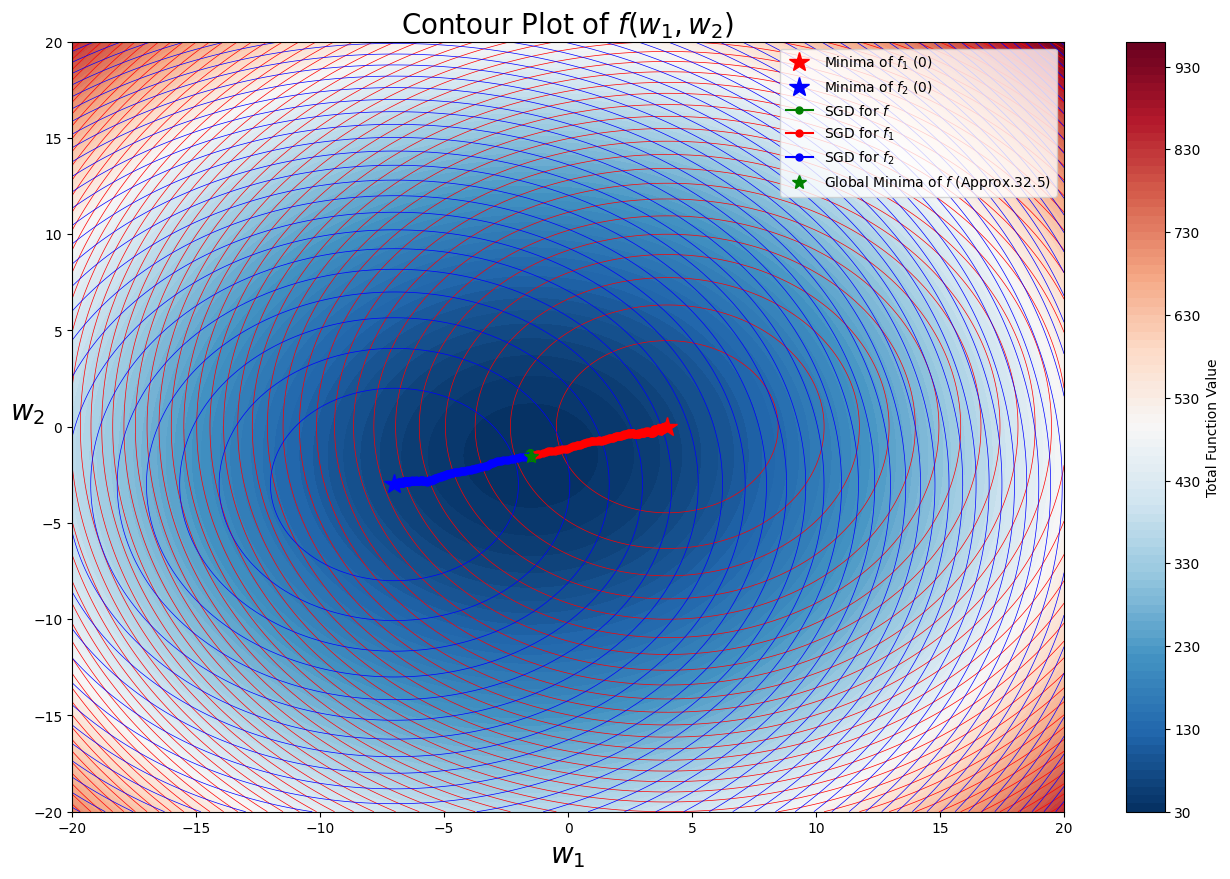

In [44]:
plt.figure(figsize=(16, 10))

contour_lines_1 =  plt.contour(W1, W2, Z1, levels=50, colors='red', linewidths=0.5)
contour_lines_2 =  plt.contour(W1, W2, Z2, levels=50, colors='blue', linewidths=0.5)

plt.plot(4, 0, 'r*', markersize=15, label=f'Minima of $f_1$ ({f1(4, 0)})')
plt.plot(-7, -3, 'b*', markersize=15, label=f'Minima of $f_2$ ({f2(-7, -3)})')

plt.plot(w_list_f[:, 0], w_list_f[:, 1], 'go', label='SGD for $f$', linestyle='solid', markersize=5)
plt.plot(w_list_f1[:, 0], w_list_f1[:, 1], 'ro', label='SGD for $f_1$', linestyle='solid', markersize=5)
plt.plot(w_list_f2[:, 0], w_list_f2[:, 1], 'bo', label='SGD for $f_2$', linestyle='solid', markersize=5)



contour = plt.contourf(W1, W2, Z, levels=100, cmap='RdBu_r', alpha=1)
plt.colorbar(contour, label='Total Function Value', orientation='vertical')
plt.plot(-1.5, -1.5, 'g*', markersize=10, label=f'Global Minima of $f$ (Approx.{f(-1.5, -1.5)})')

plt.title("Contour Plot of $f(w_1, w_2)$", fontsize=20)
plt.xlabel("$w_1$", fontsize=20)
plt.ylabel("$w_2$", rotation=0, fontsize=20)
plt.legend()

# Show the plot
plt.show()


In [49]:
#FedAvg with local epochs = 2
def fed_avg(client_1_weights, client_2_weights):
    return (client_1_weights + client_2_weights) / 2

def fed_avg_with_local_epochs(client_1_weights, client_2_weights, client_1_lr, client_2_lr, n_local_epochs, n_iter):
    w = fed_avg(client_1_weights, client_2_weights)
    w_list = [w]
    client_w1_list = [client_1_weights]
    client_w2_list = [client_2_weights]
    for i in range(n_iter):
        client_1_weights = w
        client_2_weights = w
        for j in range(n_local_epochs):
            client_1_weights = grad_step_f1(client_1_weights, client_1_lr)
            client_2_weights = grad_step_f2(client_2_weights, client_2_lr)
            client_w1_list.append(client_1_weights)
            client_w2_list.append(client_2_weights)
        w = fed_avg(client_1_weights, client_2_weights)
        w_list.append(w)
    return np.array(w_list), np.array(client_w1_list), np.array(client_w2_list)



w_init = np.array([-1.5, -1.5])
lr = 0.01
n_iter = 150

client_1_weights = w_init
client_2_weights = w_init

client_1_lr = 0.01
client_2_lr = 0.01

n_local_epochs = 2

w_list_fed_avg, w_list_f1, w_list_f2 = fed_avg_with_local_epochs(client_1_weights, client_2_weights, client_1_lr, client_2_lr, n_local_epochs, n_iter)



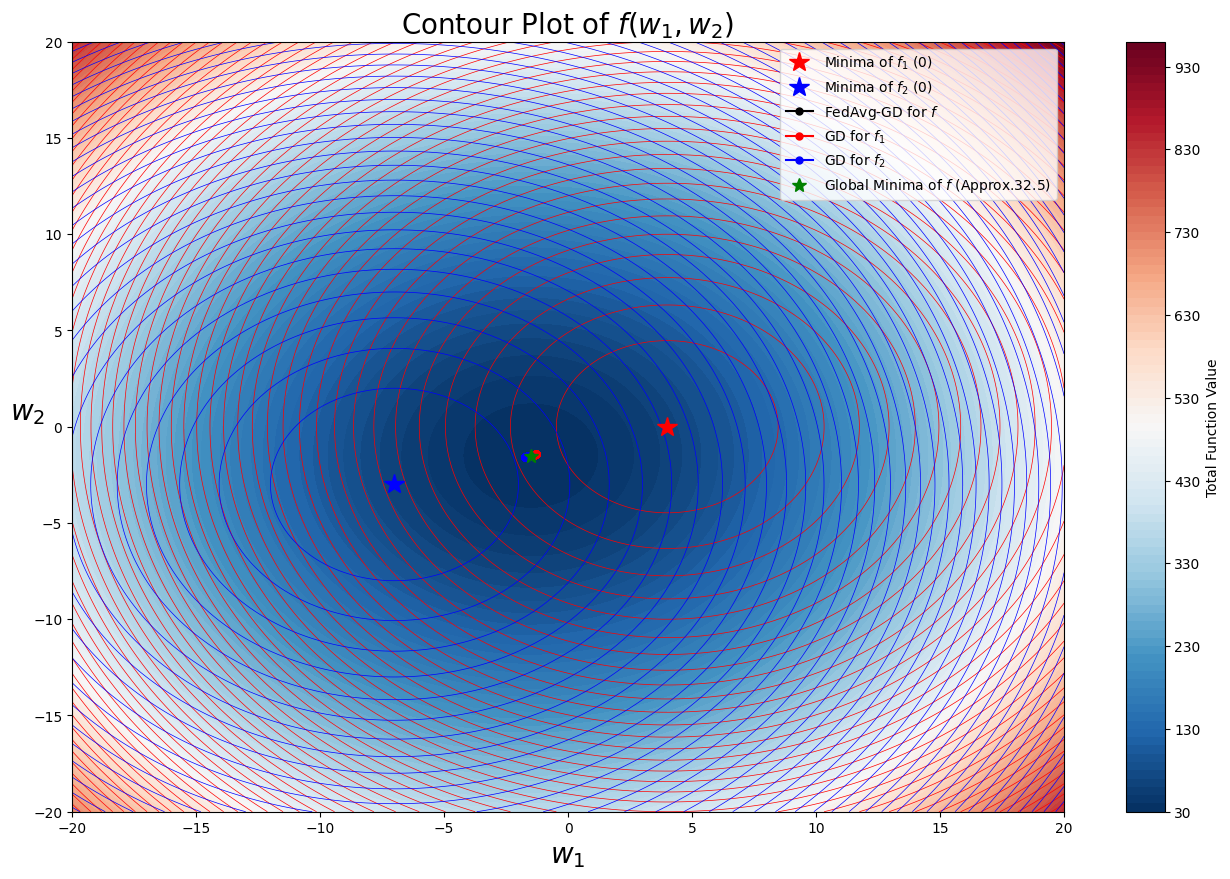

In [50]:
plt.figure(figsize=(16, 10))

contour_lines_1 =  plt.contour(W1, W2, Z1, levels=50, colors='red', linewidths=0.5)
contour_lines_2 =  plt.contour(W1, W2, Z2, levels=50, colors='blue', linewidths=0.5)

plt.plot(4, 0, 'r*', markersize=15, label=f'Minima of $f_1$ ({f1(4, 0)})')
plt.plot(-7, -3, 'b*', markersize=15, label=f'Minima of $f_2$ ({f2(-7, -3)})')

plt.plot(w_list_fed_avg[:, 0], w_list_fed_avg[:, 1], 'ko', label='FedAvg-GD for $f$', linestyle='solid', markersize=5)
plt.plot(w_list_f1[:, 0], w_list_f1[:, 1], 'ro', label='GD for $f_1$', linestyle='solid', markersize=5)
plt.plot(w_list_f2[:, 0], w_list_f2[:, 1], 'bo', label='GD for $f_2$', linestyle='solid', markersize=5)
# plt.plot(w_list_f[:, 0], w_list_f[:, 1], 'go', label='GD for $f$', linestyle='solid', markersize=5)



contour = plt.contourf(W1, W2, Z, levels=100, cmap='RdBu_r', alpha=1)
plt.colorbar(contour, label='Total Function Value', orientation='vertical')
plt.plot(-1.5, -1.5, 'g*', markersize=10, label=f'Global Minima of $f$ (Approx.{f(-1.5, -1.5)})')

plt.title("Contour Plot of $f(w_1, w_2)$", fontsize=20)
plt.xlabel("$w_1$", fontsize=20)
plt.ylabel("$w_2$", rotation=0, fontsize=20)
plt.legend()

# Show the plot
plt.show()


In [47]:

def fed_avg(client_1_weights, client_2_weights):
    return (client_1_weights + client_2_weights) / 2

def fed_avg_with_local_epochs(client_1_weights, client_2_weights, client_1_lr, client_2_lr, n_local_epochs, n_iter):
    w = fed_avg(client_1_weights, client_2_weights)
    w_list = [w]
    client_w1_list = [client_1_weights]
    client_w2_list = [client_2_weights]
    for i in range(n_iter):
        client_1_weights = w
        client_2_weights = w
        for j in range(n_local_epochs):
            client_1_weights = stochastic_grad_step_f1(client_1_weights, client_1_lr)
            client_2_weights = stochastic_grad_step_f2(client_2_weights, client_2_lr)
            client_w1_list.append(client_1_weights)
            client_w2_list.append(client_2_weights)
        w = fed_avg(client_1_weights, client_2_weights)
        w_list.append(w)
    return np.array(w_list), np.array(client_w1_list), np.array(client_w2_list)



w_init = np.array([-1.5, -1.5])
lr = 0.1
n_iter = 2

client_1_weights = w_init
client_2_weights = w_init

client_1_lr = 0.01
client_2_lr = 0.01

n_local_epochs = 5

w_list_fed_avg, w_list_f1, w_list_f2 = fed_avg_with_local_epochs(client_1_weights, client_2_weights, client_1_lr, client_2_lr, n_local_epochs, n_iter)


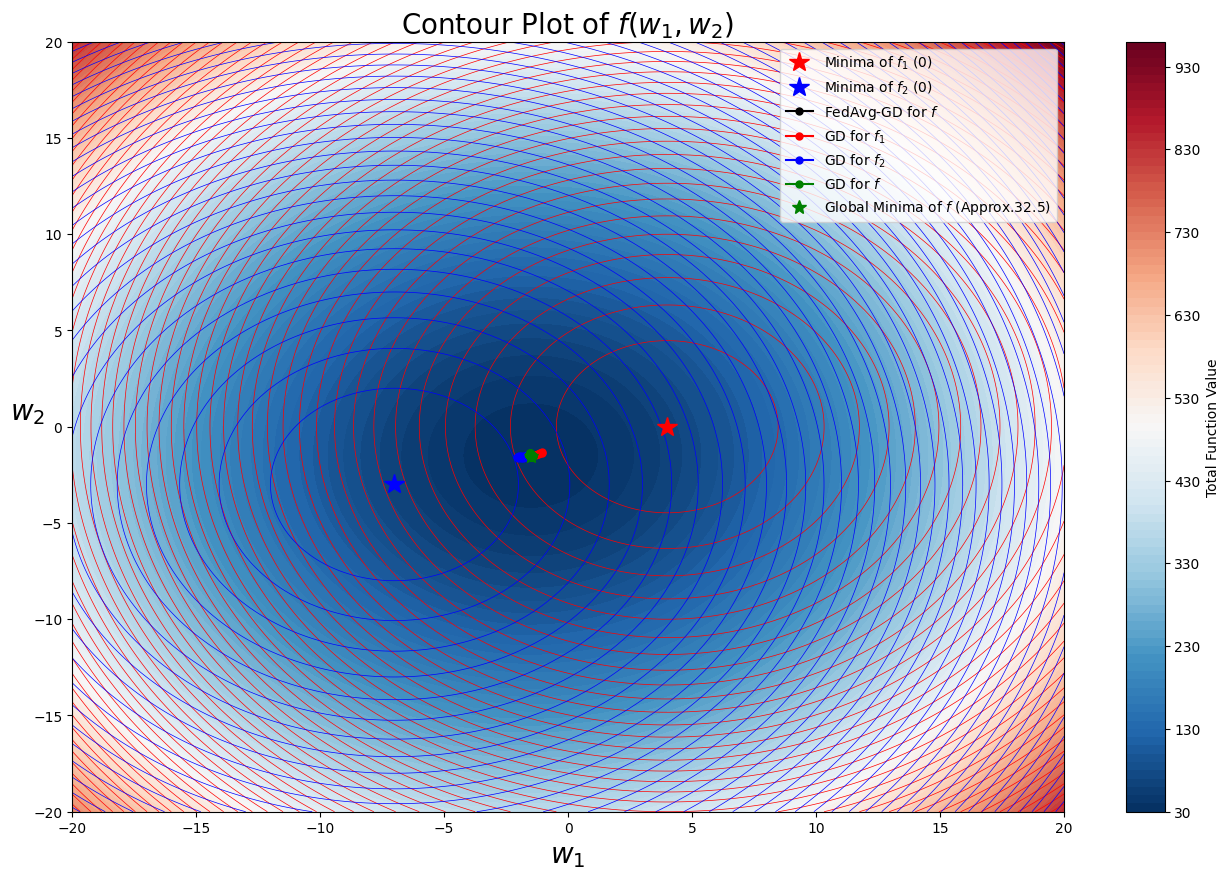

In [48]:
plt.figure(figsize=(16, 10))

contour_lines_1 =  plt.contour(W1, W2, Z1, levels=50, colors='red', linewidths=0.5)
contour_lines_2 =  plt.contour(W1, W2, Z2, levels=50, colors='blue', linewidths=0.5)

plt.plot(4, 0, 'r*', markersize=15, label=f'Minima of $f_1$ ({f1(4, 0)})')
plt.plot(-7, -3, 'b*', markersize=15, label=f'Minima of $f_2$ ({f2(-7, -3)})')

plt.plot(w_list_fed_avg[:, 0], w_list_fed_avg[:, 1], 'ko', label='FedAvg-GD for $f$', linestyle='solid', markersize=5)
plt.plot(w_list_f1[:, 0], w_list_f1[:, 1], 'ro', label='GD for $f_1$', linestyle='solid', markersize=5)
plt.plot(w_list_f2[:, 0], w_list_f2[:, 1], 'bo', label='GD for $f_2$', linestyle='solid', markersize=5)
plt.plot(w_list_f[:, 0], w_list_f[:, 1], 'go', label='GD for $f$', linestyle='solid', markersize=5)



contour = plt.contourf(W1, W2, Z, levels=100, cmap='RdBu_r', alpha=1)
plt.colorbar(contour, label='Total Function Value', orientation='vertical')
plt.plot(-1.5, -1.5, 'g*', markersize=10, label=f'Global Minima of $f$ (Approx.{f(-1.5, -1.5)})')

plt.title("Contour Plot of $f(w_1, w_2)$", fontsize=20)
plt.xlabel("$w_1$", fontsize=20)
plt.ylabel("$w_2$", rotation=0, fontsize=20)
plt.legend()

# Show the plot
plt.show()
